This notebook demonstrates a end-to-end Data Science workflow to analyze and predict medical insurance costs. In the healthcare industry, understanding "Cost Drivers" is essential for financial planning and risk management.




🎯 Objective


The goal is to analyze a dataset of 1,338 patients to identify which lifestyle and demographic factors (such as smoking, BMI, and age) lead to higher medical charges. We will conclude by building a Multiple Linear Regression model to forecast future patient costs.

Setting up the "Laboratory"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('/content/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The "First Look" (Data Inspection)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Understanding the Cost Distribution

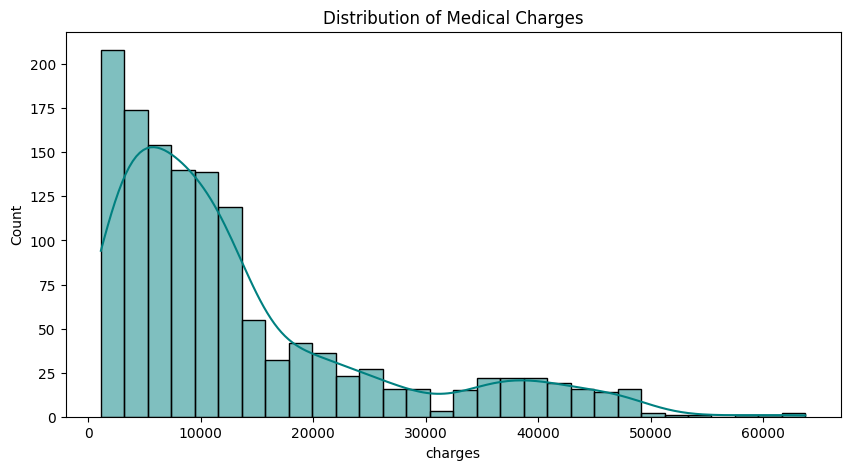

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], kde=True, color='teal')
plt.title('Distribution of Medical Charges')
plt.show()

Data Transformation (Encoding)

In [10]:
le = LabelEncoder()

In [11]:
df_encoded = df.copy()
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])

In [12]:
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])

In [13]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Correlation Matrix (Finding the "Gold")

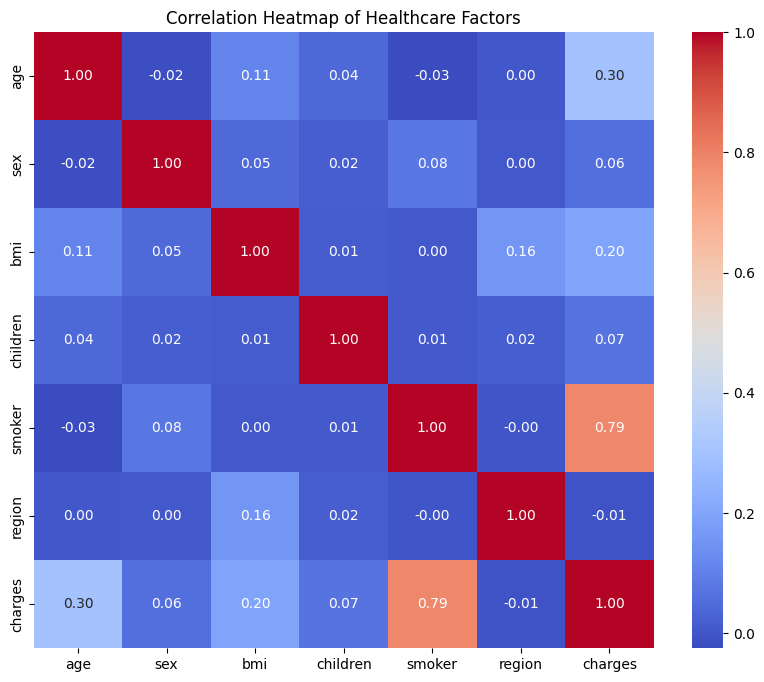

In [15]:
df_encoded['region'] = le.fit_transform(df_encoded['region'])

plt.figure(figsize=(10, 8))
correlation = df_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Healthcare Factors')
plt.show()

Model Evaluation

In [16]:
X = df_encoded[['age', 'bmi', 'smoker']]
y = df_encoded['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"R-squared Score: {r2:.2f}")
print(f"Mean Absolute Error: ${mae:.2f}")

R-squared Score: 0.78
Mean Absolute Error: $4260.56


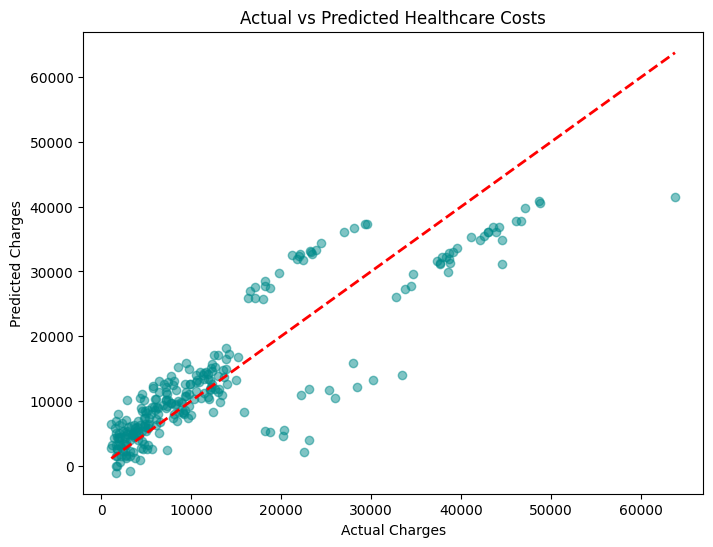

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Healthcare Costs')
plt.show()

Executive Summary

The goal of this project was to analyze healthcare insurance data to identify the primary drivers of medical expenditures. By performing Exploratory Data Analysis (EDA) and building a Multiple Linear Regression model, we successfully identified actionable patterns that impact insurance pricing and risk assessment.

🛠️ What We DidData Cleaning & Preprocessing:

 We handled categorical data (like smoker and sex) by converting them into numerical formats using Mapping and Label Encoding.

 Exploratory Data Analysis (EDA):Distribution Analysis: Discovered that medical charges are "Right-Skewed," meaning a small percentage of patients incur very high costs.

 Correlation Mapping: Used a Heatmap to mathematically prove which factors have the strongest relationship with cost.

 Machine Learning Modeling: * Implemented a Multiple Linear Regression model.

 Split the data into Training (80%) and Testing (20%) sets to ensure the model could generalize to new patients.

💡 Key Findings

The "Smoking Gun": Smoking status is the single most significant predictor of medical charges, with a correlation of 0.79.

Demographic Impact: Age and BMI are secondary factors. While age shows a steady linear increase in cost, BMI's impact is most dramatic when combined with smoking.

Model Accuracy: Our model achieved an $R^2$ Score of 0.78, meaning it can explain 78% of the variation in patient costs.

Error Margin: The Mean Absolute Error (MAE) is approximately $4,260, which provides a baseline for the expected accuracy of our predictions.

🚀 Business Recommendation

Based on this data, the insurance provider should:

Incentivize smoking cessation programs, as this is the highest risk-reduction lever.

Apply a tiered premium structure that prioritizes smoking status over age for more accurate risk-based pricing.